In [2]:
# Must be included at the beginning of each new notebook. Remember to change the app name.
import findspark
findspark.init('/home/ubuntu/spark-3.2.1-bin-hadoop2.7')
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('basics').getOrCreate()

Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/05/23 17:41:32 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
24/05/23 17:41:34 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.


In [3]:
# Let's read in the data. 
df = spark.read.csv('StressLevelDataset.csv',header=True, inferSchema=True)
cols=df.columns

In [4]:
#transform to pd
df_pd=df.toPandas()

In [5]:
#correlation matrix
df_corr=df_pd.corr()

03-DP

In [6]:
#3.1 Data Selection
threshold=0.7
df_corr1=df_corr['stress_level']
df_corr2=df_corr1.abs()
df_selected=df_corr1[df_corr2>threshold]
print(df_selected.index)
df_dropped=df_corr1[df_corr2<=threshold]
print(df_dropped.index)


Index(['anxiety_level', 'self_esteem', 'depression', 'headache',
       'sleep_quality', 'safety', 'basic_needs', 'academic_performance',
       'future_career_concerns', 'bullying', 'stress_level'],
      dtype='object')
Index(['mental_health_history', 'blood_pressure', 'breathing_problem',
       'noise_level', 'living_conditions', 'study_load',
       'teacher_student_relationship', 'social_support', 'peer_pressure',
       'extracurricular_activities'],
      dtype='object')


In [7]:
#3.1 Data Cleaning
# Using this syntax, we can drop any row with missing data. Three rows are dropped.
df_cleaned=df.na.drop()
df_cleaned_desc=df_cleaned.describe().toPandas().transpose()
df_cleaned_desc

,0,1,2,3,4
summary,count,mean,stddev,min,max
anxiety_level,1096,11.050182481751825,6.115646522385129,0,21
self_esteem,1096,17.786496350364963,8.948459225349875,0,30
mental_health_history,1096,0.49178832116788324,0.5001607913977347,0,1
depression,1096,12.552919708029197,7.727962076784146,0,27
headache,1096,2.5054744525547443,1.408379084918302,0,5
blood_pressure,1096,2.1797445255474455,0.8339761877326968,1,3
sleep_quality,1096,2.6633211678832116,1.548239687102893,0,5
breathing_problem,1096,2.750912408759124,1.4009126469468243,0,5
noise_level,1096,2.646897810218978,1.3270454884292764,0,5


In [8]:
#3.3 Data Construction
import pandas as pd
#add life quality level
#lql=-0.25*df_cleaned.select('noise_level')+0.25*df_cleaned.select('living_conditions')+0.25*df_cleaned.select('safety')+0.25*df_cleaned.select('basic_needs')
lql=-0.25*df_cleaned['noise_level']+0.25*df_cleaned['living_conditions']+0.25*df_cleaned['safety']+0.25*df_cleaned['basic_needs']
df_cleaned=df_cleaned.withColumn('life_quality_level',lql)
df_cleaned.toPandas()

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level,life_quality_level
0,14,20,0,11,2,1,2,4,2,3,...,3,2,3,3,2,3,3,2,1,1.50
1,15,8,1,15,5,3,1,4,3,1,...,1,4,1,5,1,4,5,5,2,0.50
2,12,18,1,14,2,1,2,2,2,2,...,2,3,3,2,2,3,2,2,1,1.25
3,16,12,1,15,4,3,1,3,4,2,...,2,4,1,4,1,4,4,5,2,0.50
4,16,28,0,7,2,3,5,1,3,2,...,4,3,1,2,1,5,0,5,1,1.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1091,11,17,0,14,3,1,3,2,2,2,...,2,2,2,3,3,2,3,3,1,1.25
1092,9,12,0,8,0,3,0,0,0,1,...,0,1,1,1,1,3,4,3,2,2.00
1093,4,26,0,3,1,2,5,2,2,3,...,5,1,4,1,3,1,2,1,0,2.25
1094,21,0,1,19,5,3,1,4,3,1,...,2,5,1,4,1,4,4,4,2,0.00


In [9]:
df_corr2=df_cleaned.toPandas().corr()
df_corr2['stress_level']

anxiety_level                   0.735839
self_esteem                    -0.755502
mental_health_history           0.647119
depression                      0.733899
headache                        0.712487
blood_pressure                  0.392269
sleep_quality                  -0.747989
breathing_problem               0.572932
noise_level                     0.662141
living_conditions              -0.580925
safety                         -0.708320
basic_needs                    -0.707904
academic_performance           -0.719677
study_load                      0.633510
teacher_student_relationship   -0.678356
future_career_concerns          0.741283
social_support                 -0.631158
peer_pressure                   0.689610
extracurricular_activities      0.691673
bullying                        0.750051
stress_level                    1.000000
life_quality_level             -0.823951
Name: stress_level, dtype: float64

In [10]:
selected_fields=df_selected.index.tolist()
selected_fields.append('life_quality_level')
df1=df_cleaned.select(selected_fields)
df1.toPandas()

,anxiety_level,self_esteem,depression,headache,sleep_quality,safety,basic_needs,academic_performance,future_career_concerns,bullying,stress_level,life_quality_level
0,14,20,11,2,2,3,2,3,3,2,1,1.50
1,15,8,15,5,1,2,2,1,5,5,2,0.50
2,12,18,14,2,2,3,2,2,2,2,1,1.25
3,16,12,15,4,1,2,2,2,4,5,2,0.50
4,16,28,7,2,5,4,3,4,2,5,1,1.50
...,...,...,...,...,...,...,...,...,...,...,...,...
1091,11,17,14,3,3,2,3,2,3,3,1,1.25
1092,9,12,8,0,0,3,4,0,1,3,2,2.00
1093,4,26,3,1,5,4,4,5,1,1,0,2.25
1094,21,0,19,5,1,1,1,2,4,4,2,0.00


In [11]:
#split and integrate
## We can use filter method to split
split1=df1.filter(df1['self_esteem']>15)
split2=df1.filter(df1['self_esteem']<=15)
#save to csv
#split1.write.csv('split1.csv', header=True)
#split2.write.csv('split2.csv', header=True)

In [12]:
#load the two datasets
file1=spark.read.csv('split1.csv',header=True, inferSchema=True)
file2=spark.read.csv('split2.csv',header=True, inferSchema=True)
union_df=file1.union(file2)
union_df.toPandas()

,anxiety_level,self_esteem,depression,headache,sleep_quality,safety,basic_needs,academic_performance,future_career_concerns,bullying,stress_level,life_quality_level
0,14,20,11,2,2,3,2,3,3,2,1,1.50
1,12,18,14,2,2,3,2,2,2,2,1,1.25
2,16,28,7,2,5,4,3,4,2,5,1,1.50
3,4,26,6,1,4,4,4,5,1,1,0,2.75
4,13,22,12,3,2,3,3,3,3,2,1,1.50
...,...,...,...,...,...,...,...,...,...,...,...,...
1091,6,11,24,4,1,4,2,0,1,1,0,2.25
1092,19,11,25,4,1,1,2,1,4,5,2,-0.25
1093,9,12,8,0,0,3,4,0,1,3,2,2.00
1094,21,0,19,5,1,1,1,2,4,4,2,0.00


In [13]:
#3.5 Data Formatting
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, when
# Map the values in the 'stress_level' column to their corresponding labels
df_map = df1.withColumn("stress_label", 
                     when(col("stress_level") == 0, 'Low Stress')
                     .when(col("stress_level") == 1, 'Medium Stress')
                     .when(col("stress_level") == 2, 'High Stress'))
df_map.toPandas()

,anxiety_level,self_esteem,depression,headache,sleep_quality,safety,basic_needs,academic_performance,future_career_concerns,bullying,stress_level,life_quality_level,stress_label
0,14,20,11,2,2,3,2,3,3,2,1,1.50,Medium Stress
1,15,8,15,5,1,2,2,1,5,5,2,0.50,High Stress
2,12,18,14,2,2,3,2,2,2,2,1,1.25,Medium Stress
3,16,12,15,4,1,2,2,2,4,5,2,0.50,High Stress
4,16,28,7,2,5,4,3,4,2,5,1,1.50,Medium Stress
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1091,11,17,14,3,3,2,3,2,3,3,1,1.25,Medium Stress
1092,9,12,8,0,0,3,4,0,1,3,2,2.00,High Stress
1093,4,26,3,1,5,4,4,5,1,1,0,2.25,Low Stress
1094,21,0,19,5,1,1,1,2,4,4,2,0.00,High Stress


In [14]:
df_map=df_map.drop("stress_level")
df_map.toPandas()

,anxiety_level,self_esteem,depression,headache,sleep_quality,safety,basic_needs,academic_performance,future_career_concerns,bullying,life_quality_level,stress_label
0,14,20,11,2,2,3,2,3,3,2,1.50,Medium Stress
1,15,8,15,5,1,2,2,1,5,5,0.50,High Stress
2,12,18,14,2,2,3,2,2,2,2,1.25,Medium Stress
3,16,12,15,4,1,2,2,2,4,5,0.50,High Stress
4,16,28,7,2,5,4,3,4,2,5,1.50,Medium Stress
...,...,...,...,...,...,...,...,...,...,...,...,...
1091,11,17,14,3,3,2,3,2,3,3,1.25,Medium Stress
1092,9,12,8,0,0,3,4,0,1,3,2.00,High Stress
1093,4,26,3,1,5,4,4,5,1,1,2.25,Low Stress
1094,21,0,19,5,1,1,1,2,4,4,0.00,High Stress


24/05/23 17:41:49 WARN InstanceBuilder$NativeBLAS: Failed to load implementation from:dev.ludovic.netlib.blas.JNIBLAS
24/05/23 17:41:49 WARN InstanceBuilder$NativeBLAS: Failed to load implementation from:dev.ludovic.netlib.blas.ForeignLinkerBLAS
24/05/23 17:41:49 WARN LAPACK: Failed to load implementation from: com.github.fommil.netlib.NativeSystemLAPACK
24/05/23 17:41:49 WARN LAPACK: Failed to load implementation from: com.github.fommil.netlib.NativeRefLAPACK


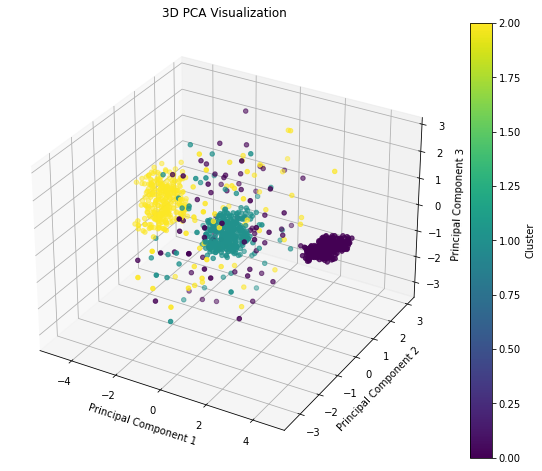

In [15]:
# 04-DT
#PCA
from pyspark.ml.feature import VectorAssembler, StandardScaler, PCA
from pyspark.ml.linalg import Vectors
#initialize SparkSession
spark = SparkSession.builder.appName("PCAExample").getOrCreate()
data=df1
# Extract features and target variable
X = data.drop('stress_level')  # Features
feature_cols=X.columns
# Combining feature columns into a vector column using VectorAssembler
assembler = VectorAssembler(inputCols=feature_cols, outputCol="features")
data = assembler.transform(data)
# Data standardization
scaler = StandardScaler(inputCol="features", outputCol="scaledFeatures", withMean=True, withStd=True)
scaler_model = scaler.fit(data)
data = scaler_model.transform(data)

# PCA
n_components = 3
pca = PCA(k=n_components, inputCol="scaledFeatures", outputCol="pcaFeatures")
pca_model = pca.fit(data)
result = pca_model.transform(data)
# Extraction of PCA-converted data
pca_columns = [f"PC{i}" for i in range(1, n_components + 1)]
result_df = result.select("pcaFeatures", "stress_level").rdd.map(lambda row: row.pcaFeatures.toArray().tolist() + [row.stress_level]).toDF(pca_columns + ["stress_level"])
# Convert to pandas DataFrame for visualization
pca_df = result_df.toPandas()
#visualization
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
pc1 = pca_df['PC1']
pc2 = pca_df['PC2']
pc3 = pca_df['PC3']
# Creating 3D graphics
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plotting Scatterplots
scatter = ax.scatter(pc1, pc2, pc3, c=pca_df['stress_level'], cmap='viridis') 

# Add title and tags
ax.set_title('3D PCA Visualization')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')

# Adding a color bar
plt.colorbar(scatter, label='Cluster')

# Display Graphic
plt.show()


In [16]:
# 06-DMA
# Load relevant algorithms
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler, StandardScaler
from pyspark.ml.classification import LogisticRegression, RandomForestClassifier, GBTClassifier,OneVsRest
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score, ConfusionMatrixDisplay

In [38]:
#07-DM
#Logistic Regression
data0=result_df
#data0=df1
# Combined feature columns
assembler = VectorAssembler(inputCols=data0.drop('stress_level').columns, outputCol="features")
data = assembler.transform(data0)
# Split the data into training and testing set
lr_train,lr_test = data.randomSplit([0.7,0.3],seed=10)
lr = LogisticRegression(featuresCol="features", labelCol="stress_level")

# fit the model and predict
lr_model = lr.fit(lr_train)
lr_predictions = lr_model.transform(lr_test)
# evaluate
evaluator = MulticlassClassificationEvaluator(labelCol="stress_level", predictionCol="prediction", metricName="accuracy")
lr_accuracy = evaluator.evaluate(lr_predictions)
print(f"Logistic Regression Accuracy: {lr_accuracy}")
# Select prediction label columns from lr_predictions DataFrame and convert to Python list
y_pred = lr_predictions.select("prediction").rdd.map(lambda x: x[0]).collect()
lr_test1=lr_test.toPandas()
y_test = lr_test1['stress_level']
class_report_lr = classification_report(y_test, y_pred)
print(class_report_lr)



Logistic Regression Accuracy: 0.8713450292397661
              precision    recall  f1-score   support

           0       0.97      0.85      0.90       111
           1       0.78      0.97      0.87       114
           2       0.90      0.79      0.85       117

    accuracy                           0.87       342
   macro avg       0.88      0.87      0.87       342
weighted avg       0.88      0.87      0.87       342



In [24]:
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder
from pyspark.ml import Pipeline
from sklearn.metrics import classification_report

# Assuming result_df is your DataFrame containing features and labels
data0 = result_df

# Create a VectorAssembler to combine feature columns into a single "features" column
assembler = VectorAssembler(inputCols=data0.drop('stress_level').columns, outputCol="features")

# Define Logistic Regression model
lr = LogisticRegression(featuresCol="features", labelCol="stress_level")

# Create a pipeline with VectorAssembler and Logistic Regression
pipeline = Pipeline(stages=[assembler, lr])

# Split the data into training and testing sets
lr_train, lr_test = data0.randomSplit([0.7, 0.3], seed=10)

# Define parameter grid for cross-validation
paramGrid = ParamGridBuilder() \
    .addGrid(lr.regParam, [0.1, 0.01]) \
    .addGrid(lr.elasticNetParam, [0.0, 0.5]) \
    .build()

# Define cross-validation
crossval = CrossValidator(estimator=pipeline,
                          estimatorParamMaps=paramGrid,
                          evaluator=MulticlassClassificationEvaluator(labelCol="stress_level", 
                                                                      predictionCol="prediction", 
                                                                      metricName="accuracy"),
                          numFolds=3)  # Number of folds

# Fit the CrossValidator to the training data
cvModel = crossval.fit(lr_train)

# Make predictions on the test data
lr_predictions = cvModel.transform(lr_test)

# Evaluate the model
evaluator = MulticlassClassificationEvaluator(labelCol="stress_level", predictionCol="prediction", metricName="accuracy")
lr_accuracy = evaluator.evaluate(lr_predictions)
#print(f"Logistic Regression Accuracy: {lr_accuracy}")

# Select prediction label columns from lr_predictions DataFrame and convert to Python list
y_pred = lr_predictions.select("prediction").rdd.map(lambda x: x[0]).collect()
lr_test1 = lr_test.toPandas()
y_test = lr_test1['stress_level']

# Generate classification report
print("Cross-validation Classification Report:")
class_report_lr = classification_report(y_test, y_pred)
print(class_report_lr)

Logistic Regression Accuracy: 0.8742690058479532
              precision    recall  f1-score   support

           0       0.97      0.84      0.90       111
           1       0.80      0.97      0.88       114
           2       0.88      0.81      0.84       117

    accuracy                           0.87       342
   macro avg       0.88      0.87      0.87       342
weighted avg       0.88      0.87      0.87       342



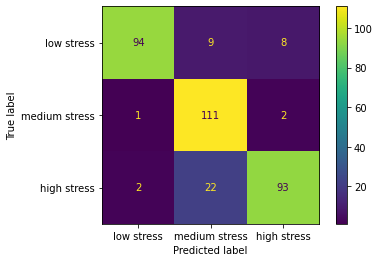

In [53]:
#confusion matrix of lr
cm1 = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm1, display_labels=['low stress','medium stress','high stress'])
disp.plot(
    include_values=True,
    cmap="viridis",                 
    ax=None,                        
    xticks_rotation="horizontal",   
    values_format="d"               
)

In [20]:
#svc
lr_train1=lr_train.toPandas()
lr_test1=lr_test.toPandas()
X_train = lr_train1.drop(['stress_level','features'],axis=1)
X_test = lr_test1.drop(['stress_level','features'], axis=1)
y_train = lr_train1['stress_level']
y_test = lr_test1['stress_level']
svc_model=SVC(random_state=10)
c2=svc_model.fit(X_train, y_train)
y_pred2=c2.predict(X_test)
class_report_svc = classification_report(y_test, y_pred2)
print('svc','test:',c2.score(X_test,y_test),'train:',c2.score(X_train,y_train))
print(class_report_svc)

svc test: 0.8801169590643275 train: 0.896551724137931
              precision    recall  f1-score   support

           0       0.94      0.86      0.90       111
           1       0.84      0.94      0.89       114
           2       0.87      0.84      0.85       117

    accuracy                           0.88       342
   macro avg       0.88      0.88      0.88       342
weighted avg       0.88      0.88      0.88       342



In [23]:
from sklearn.model_selection import cross_val_predict
# Define SVC model
svc_model = SVC(random_state=10)
# Perform cross-validation
y_pred_cv = cross_val_predict(svc_model, X_train, y_train, cv=3)
# Fit the model on the entire training data
svc_model.fit(X_train, y_train)
# Make predictions on the test data
y_pred_svc = svc_model.predict(X_test)
# Generate classification reports
class_report_svc_cv = classification_report(y_train, y_pred_cv)
class_report_svc_test = classification_report(y_test, y_pred_svc)
print("Cross-validation Classification Report:")
print(class_report_svc_cv)

Cross-validation Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.79      0.83       261
           1       0.79      0.87      0.83       244
           2       0.83      0.83      0.83       249

    accuracy                           0.83       754
   macro avg       0.83      0.83      0.83       754
weighted avg       0.83      0.83      0.83       754



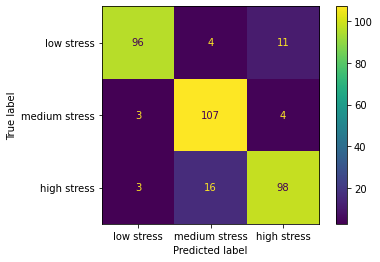

In [52]:
#confusion matrix of svc
cm2 = confusion_matrix(y_test,y_pred2)
disp = ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=['low stress','medium stress','high stress'])
disp.plot(
    include_values=True,
    cmap="viridis",                 
    ax=None,                        
    xticks_rotation="horizontal",   
    values_format="d"               
)

In [54]:
#choosing k for knn 
for n in range(3,13): #from 3 to 12
    c4=KNeighborsClassifier(n_neighbors=n,n_jobs=n).fit(X_train,y_train)
    print('n:',n,\
          'test:',c4.score(X_test,y_test),\
          'train:',c4.score(X_train,y_train))

n: 3 test: 0.8801169590643275 train: 0.9257294429708223
n: 4 test: 0.8888888888888888 train: 0.9111405835543767
n: 5 test: 0.8888888888888888 train: 0.9084880636604774
n: 6 test: 0.8947368421052632 train: 0.9005305039787799
n: 7 test: 0.9035087719298246 train: 0.9005305039787799
n: 8 test: 0.8859649122807017 train: 0.9018567639257294
n: 9 test: 0.8801169590643275 train: 0.903183023872679
n: 10 test: 0.8742690058479532 train: 0.9045092838196287
n: 11 test: 0.8830409356725146 train: 0.8992042440318302
n: 12 test: 0.8830409356725146 train: 0.8925729442970822


In [27]:
#knn
knn_model=KNeighborsClassifier(n_neighbors=7)
c3=knn_model.fit(X_train,y_train)
y_pred3=c3.predict(X_test)
class_report_knn = classification_report(y_test, y_pred3)
#print('knn','test:',c3.score(X_test,y_test),'train:',c3.score(X_train,y_train))
print(class_report_knn)

              precision    recall  f1-score   support

           0       0.91      0.91      0.91       111
           1       0.86      0.95      0.90       114
           2       0.94      0.85      0.90       117

    accuracy                           0.90       342
   macro avg       0.91      0.90      0.90       342
weighted avg       0.91      0.90      0.90       342



In [31]:
df2=df.withColumn('life_quality_level',lql)
data0=df2.select(selected_fields)
data0

DataFrame[anxiety_level: int, self_esteem: int, depression: int, headache: int, sleep_quality: int, safety: int, basic_needs: int, academic_performance: int, future_career_concerns: int, bullying: int, stress_level: int, life_quality_level: double]

In [43]:
df2=df.withColumn('life_quality_level',lql)
data0=df2.select(selected_fields)
#data0=df1
# Combined feature columns
assembler = VectorAssembler(inputCols=data0.drop('stress_level').columns, outputCol="features",handleInvalid="keep")
data = assembler.transform(data0)
# Split the data into training and testing set
lr_train,lr_test = data.randomSplit([0.7,0.3],seed=10)
lr_train1=lr_train.toPandas()
lr_test1=lr_test.toPandas()
X_train = lr_train1.drop(['stress_level','features'],axis=1)
X_test = lr_test1.drop(['stress_level','features'], axis=1)
y_train = lr_train1['stress_level']
y_test = lr_test1['stress_level']
from sklearn.impute import SimpleImputer
# Impute missing values with the mean
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)
# Define and train KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=7)
knn_model.fit(X_train_imputed, y_train)
# Make predictions
y_pred_knn = knn_model.predict(X_test_imputed)
# Evaluate model
class_report_knn = classification_report(y_test, y_pred_knn)
print(class_report_knn)
"""
c4=knn_model.fit(X_train,y_train)
y_pred4=c3.predict(X_test)
class_report_knn = classification_report(y_test, y_pred4)
#print('knn','test:',c3.score(X_test,y_test),'train:',c3.score(X_train,y_train))
print(class_report_knn)
"""

              precision    recall  f1-score   support

           0       0.90      0.83      0.86       111
           1       0.88      0.92      0.90       123
           2       0.86      0.89      0.87       108

    accuracy                           0.88       342
   macro avg       0.88      0.88      0.88       342
weighted avg       0.88      0.88      0.88       342



"\nc4=knn_model.fit(X_train,y_train)\ny_pred4=c3.predict(X_test)\nclass_report_knn = classification_report(y_test, y_pred4)\n#print('knn','test:',c3.score(X_test,y_test),'train:',c3.score(X_train,y_train))\nprint(class_report_knn)\n"

In [22]:
from sklearn.model_selection import cross_val_predict
# Define KNN model
knn_model = KNeighborsClassifier(n_neighbors=7)
# Perform cross-validation
y_pred_cv = cross_val_predict(knn_model, X_train, y_train, cv=3)
# Fit the model on the entire training data
knn_model.fit(X_train, y_train)
# Make predictions on the test data
y_pred_knn = knn_model.predict(X_test)
# Generate classification report
class_report_knn_cv = classification_report(y_train, y_pred_cv)
class_report_knn_test = classification_report(y_test, y_pred_knn)
print("Cross-validation Classification Report:")
print(class_report_knn_cv)

Cross-validation Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.79      0.82       261
           1       0.81      0.87      0.84       244
           2       0.84      0.84      0.84       249

    accuracy                           0.83       754
   macro avg       0.83      0.83      0.83       754
weighted avg       0.83      0.83      0.83       754



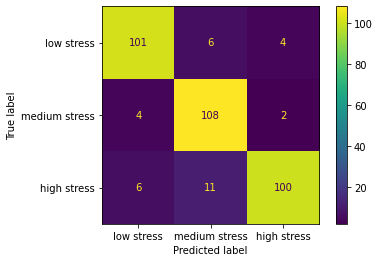

In [56]:
#confusion matrix of knn
cm3 = confusion_matrix(y_test,y_pred3)
disp = ConfusionMatrixDisplay(confusion_matrix=cm3, display_labels=['low stress','medium stress','high stress'])
disp.plot(
    include_values=True,
    cmap="viridis",                 
    ax=None,                        
    xticks_rotation="horizontal",   
    values_format="d"               
)

In [26]:
print("lr:Cross-validation Classification Report:")
print(class_report_lr)
print("svc:Cross-validation Classification Report:")
print(class_report_svc_cv)
print("knn:Cross-validation Classification Report:")
print(class_report_knn_cv)

lr:Cross-validation Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.84      0.90       111
           1       0.80      0.97      0.88       114
           2       0.88      0.81      0.84       117

    accuracy                           0.87       342
   macro avg       0.88      0.87      0.87       342
weighted avg       0.88      0.87      0.87       342

svc:Cross-validation Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.79      0.83       261
           1       0.79      0.87      0.83       244
           2       0.83      0.83      0.83       249

    accuracy                           0.83       754
   macro avg       0.83      0.83      0.83       754
weighted avg       0.83      0.83      0.83       754

knn:Cross-validation Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.79      0.82       26

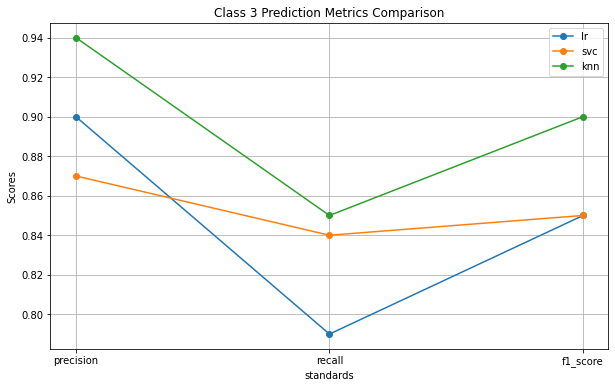

In [57]:
#visualization the class report for stress level=2
standards_names = ['precision', 'recall', 'f1_score']
lr = [0.90, 0.79, 0.85]
svc = [0.87, 0.84, 0.85]
knn = [0.94, 0.85, 0.90]
# Create line chart
fig, ax = plt.subplots(figsize=(10, 6))
# Plot classifiers
ax.plot(lr, marker='o', label='lr')
ax.plot(svc, marker='o', label='svc')
ax.plot(knn, marker='o', label='knn')
ax.set_xlabel('standards')
ax.set_ylabel('Scores')
ax.set_title('Class 3 Prediction Metrics Comparison')
import numpy as np
ax.set_xticks(np.arange(len(standards_names)))
ax.set_xticklabels(standards_names)
ax.legend()
plt.grid(True)
plt.show()

Random Forest Accuracy: 0.847953216374269
Random Forest Feature Importances:
sleep_quality: 0.1974781062576795
blood_pressure: 0.12101074405416472
life_quality_level: 0.07779818750311494
self_esteem: 0.06863096012357689
safety: 0.06704984233891192
headache: 0.06395129553799715
bullying: 0.06124549895333681
social_support: 0.06061765194474158
extracurricular_activities: 0.04495217424676953
teacher_student_relationship: 0.044452104470683235
anxiety_level: 0.03681475984482438
depression: 0.03250812882936037
future_career_concerns: 0.028639158078279155
basic_needs: 0.026170879928228568
peer_pressure: 0.022328265858405263
academic_performance: 0.022301489699422607
noise_level: 0.007587469477219054
study_load: 0.0057582243137765405
breathing_problem: 0.0049030836849445585
living_conditions: 0.0042128165825633885
mental_health_history: 0.001589158271999714


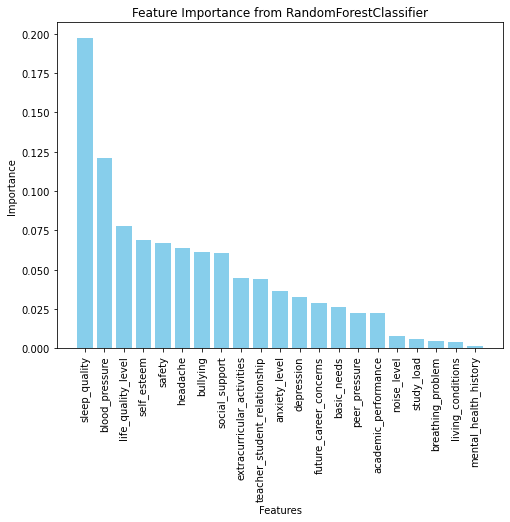

In [97]:
# Random Forest
data0=df_cleaned
# Combined feature columns
feature_cols=data0.drop('stress_level').columns
assembler = VectorAssembler(inputCols=feature_cols, outputCol="features")
data = assembler.transform(data0)
# Split the data into training and testing set
rf_train,rf_test = data.randomSplit([0.7,0.3],seed=10)
#fit the model and predict
rf = RandomForestClassifier(featuresCol="features", labelCol="stress_level", numTrees=20)
rf_model = rf.fit(rf_train)
rf_predictions = rf_model.transform(rf_test)
# evaluate
rf_accuracy = evaluator.evaluate(rf_predictions)
print(f"Random Forest Accuracy: {rf_accuracy}")
#feature importance
rf_feature_importances = rf_model.featureImportances
# Sort feature importance
sorted_feature_importances = sorted(zip(feature_cols, rf_feature_importances), key=lambda x: x[1], reverse=True)
sorted_features, sorted_importances = zip(*sorted_feature_importances)

print("Random Forest Feature Importances:")
for feature, importance in sorted_feature_importances:
    print(f"{feature}: {importance}")
    
#RF visualization
plt.figure(figsize=(8, 6))
plt.bar(sorted_features, sorted_importances, color='skyblue')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance from RandomForestClassifier')
plt.xticks(rotation=90)  # Rotate x-axis labels vertically
plt.show()


OneVsRest GBT Accuracy: 0.8742690058479532
Overall Feature Importances:
blood_pressure: 0.20909677067825125
life_quality_level: 0.18938344959013723
sleep_quality: 0.15335389247442507
bullying: 0.0964619575935539
self_esteem: 0.04998868326198915
academic_performance: 0.045753127464957764
depression: 0.03723203757392348
future_career_concerns: 0.029710071472782294
breathing_problem: 0.029139216000794516
anxiety_level: 0.025036177701753055
noise_level: 0.022506732531163063
headache: 0.018673006257760093
basic_needs: 0.015670702570226992
social_support: 0.013847620542185593
study_load: 0.013369548016725507
teacher_student_relationship: 0.01232108395943423
safety: 0.01154876248324769
peer_pressure: 0.010117591252006888
extracurricular_activities: 0.007212260126358983
mental_health_history: 0.005761782261218429
living_conditions: 0.0038155261871047424


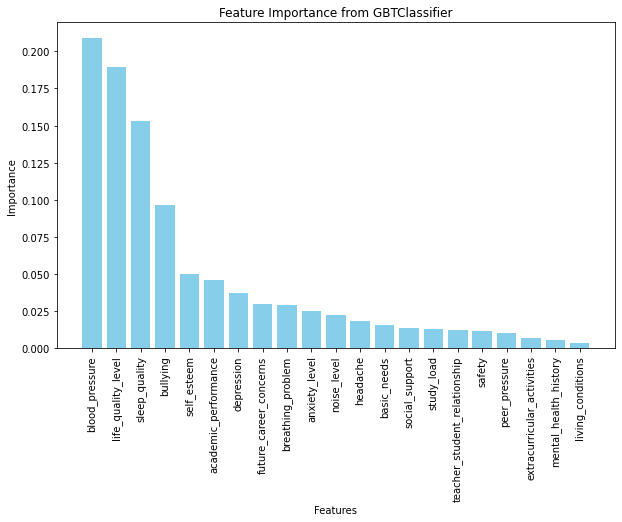

In [87]:
#GBM
data0=df_cleaned
# Combined feature columns
feature_cols=data0.drop('stress_level').columns
assembler = VectorAssembler(inputCols=feature_cols, outputCol="features")
data = assembler.transform(data0)
# Split the data into training and testing set
gbt_train,gbt_test = data.randomSplit([0.7,0.3],seed=10)
# create model
gbt = GBTClassifier(featuresCol="features", labelCol="stress_level", maxIter=20)
# Extending GBTClassifier to Multiclassification with OneVsRest
gbt = OneVsRest(classifier=gbt,labelCol="stress_level")
#fit the model and predict
gbt_model = gbt.fit(gbt_train)
gbt_predictions = gbt_model.transform(gbt_test)
#evaluate
evaluator = MulticlassClassificationEvaluator(labelCol="stress_level", predictionCol="prediction", metricName="accuracy")
ovr_accuracy = evaluator.evaluate(gbt_predictions)
print(f"OneVsRest GBT Accuracy: {ovr_accuracy}")
# feature importance
feature_importances = [0.0] * len(feature_cols)
for model in gbt_model.models:
    importances = model.featureImportances
    for idx, importance in enumerate(importances):
        feature_importances[idx] += importance
#calculate average importance
gbm_feature_importances = [importance / len(gbt_model.models) for importance in feature_importances]
# sort
sorted_feature_importances = sorted(zip(feature_cols, gbm_feature_importances), key=lambda x: x[1], reverse=True)
sorted_features, sorted_importances = zip(*sorted_feature_importances)

print("Overall Feature Importances:")
for feature, importance in sorted_feature_importances:
    print(f"{feature}: {importance}")

#GBM visualization
plt.figure(figsize=(10, 6))
plt.bar(sorted_features, sorted_importances, color='skyblue')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance from GBTClassifier')
plt.xticks(rotation=90) # Rotate the x-axis label by 90 degrees
plt.show()

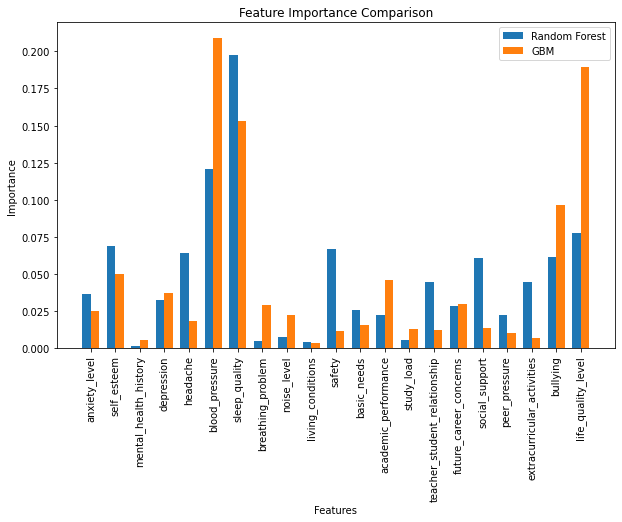

In [100]:
#visualization for comparison
# Plotting
plt.figure(figsize=(10, 6))
bar_width = 0.35
import numpy as np
index = np.arange(len(feature_cols))

plt.bar(index,  rf_feature_importances.toArray().tolist(), bar_width, label='Random Forest')
plt.bar(index + bar_width, gbm_feature_importances, bar_width, label='GBM')

plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance Comparison')
plt.xticks(index + bar_width / 2, feature_cols,rotation=90)
plt.legend()
plt.show()

In [101]:
lr_model

LogisticRegressionModel: uid=LogisticRegression_057c2fc88784, numClasses=3, numFeatures=3

In [103]:
svc_model

SVC(random_state=10)

In [104]:
knn_model

KNeighborsClassifier(n_neighbors=7)

In [105]:
rf_model

RandomForestClassificationModel: uid=RandomForestClassifier_8b88d6fbbf6e, numTrees=20, numClasses=3, numFeatures=21

In [106]:
gbt_model

OneVsRestModel_b74a1e010632